In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [4]:
class Recording:
    def __init__(self, meta):
        self._id = meta._id
        self.subject_id = meta.subject_id
        self.phone_placement = meta.phone_placement
        self.recording_duration = meta.recording_duration
        self.chunk_ids = meta.chunk_ids
        self.labels = []
        self.p_ecg = []
        self.p_hr = []
        self.p_contact = []
        self.p_acc_x = []
        self.p_acc_y = []
        self.p_acc_z = []
        self.acc_x = []
        self.acc_y = []
        self.acc_z = []
        self.gyr_x = []
        self.gyr_y = []
        self.gyr_z = []
        self.gra_x = []
        self.gra_y = []
        self.gra_z = []
        self.mag_x = []
        self.mag_y = []
        self.mag_z = []
        self.att_roll = []
        self.att_pitch = []
        self.att_yaw = []
        self.delta_heading = []
        
        print(self._id)
        r_chunks = rec_chunks[self._id]
        for c in r_chunks:
            print(c._id)
        print()
        ordered_chunk_ids = {}
        
        for chunk in r_chunks:
            ordered_chunk_ids[chunk.chunk_index] = chunk
            
        for i in range(1,len(r_chunks)-1):
            chunk = chunks[ordered_chunk_ids[i]._id]
            
            assert(i == chunk.chunk_index)
            
            self.labels += chunk.labels
            self.p_ecg += chunk.p_ecg
            self.p_hr += chunk.p_hr
            self.p_contact += chunk.p_contact
            self.p_acc_x += chunk.p_acc_x
            self.p_acc_y += chunk.p_acc_y
            self.p_acc_z += chunk.p_acc_z
            self.acc_x += chunk.acc_x
            self.acc_y += chunk.acc_y
            self.acc_z += chunk.acc_z
            self.gyr_x += chunk.gyr_x
            self.gyr_y += chunk.gyr_y
            self.gyr_z += chunk.gyr_z
            self.gra_x += chunk.gra_x
            self.gra_y += chunk.gra_y
            self.gra_z += chunk.gra_z
            self.mag_x += chunk.mag_x
            self.mag_y += chunk.mag_y
            self.mag_z += chunk.mag_z
            self.att_roll += chunk.att_roll
            self.att_pitch += chunk.att_pitch
            self.att_yaw += chunk.att_yaw
            self.delta_heading += chunk.delta_heading

            print(len(chunk.labels))
            print(len(chunk.p_ecg))
            print(len(chunk.p_hr))
            print(len(chunk.p_acc_x))
            print(len(chunk.p_contact))
            print(len(chunk.acc_x))
            print()
            
        print(len(self.labels))
        print(len(self.p_ecg))
        print(len(self.p_hr))
        print(len(self.p_acc_x))
        print(len(self.p_contact))
        print(len(self.acc_x))
        print()
        
    def isEqual(self, rec):
        return self.labels == rec.labels and self.p_ecg == rec.p_ecg and self.p_hr == rec.p_hr \
        and self.p_acc_x == rec.p_acc_x and self.p_acc_y == rec.p_acc_y and self.p_acc_z == rec.p_acc_z \
        and self.p_contact == rec.p_contact and self.acc_x == rec.acc_x and self.acc_y == rec.acc_y and \
        self.acc_z == rec.acc_z and self.gyr_x == rec.gyr_x and self.gyr_y == rec.gyr_y and \
        self.gyr_z == rec.gyr_z and self.gra_x == rec.gra_x and self.gra_y == rec.gra_y and \
        self.gra_z == rec.gra_z and self.mag_x == rec.mag_x and self.mag_y == rec.mag_y and \
        self.mag_z == rec.mag_z and self.att_pitch == rec.att_pitch and self.att_roll == rec.att_roll and \
        self.att_yaw == rec.att_yaw and self.delta_heading == rec.delta_heading
            

# Read pickle data

In [5]:
ddir = os.getcwd() + "/pickles"
files = os.listdir(ddir)
recordings = []

for f in files:
    reader = open(ddir + "/" + f, "rb")
    rec = pickle.load(reader)
    print(rec._id)
    recordings.append(rec)

849B275E-A5B1-4A03-A374-CCFA44F34960
AD642CAB-2FE2-4B02-B7E7-0BC7695B6D04


# Visualize fall

In [6]:
def getFallIndexes(labels):
    val = True
    sublist = labels
    idxs = []
    lastIdx = 0

    while len(sublist) > 0:
        if val in sublist:
            idx = sublist.index(val)
            idxs.append(lastIdx + idx)
            sublist = labels[lastIdx + idx:]
            val = not val
            lastIdx += idx
        else:
            sublist = []
            
    return idxs

In [7]:
def plot_time(data, labels):
    print(len(data))
    print(len(data)/len(labels))
    print()
    
    mu = sum(data)/len(data)
    data = [el-mu for el in data]
    
    if abs(min(data)) > max(data):
        data = [el/abs(min(data)) for el in data]
    else:
        data = [el/max(data) for el in data]
        
    idxs = getFallIndexes(labels)
    
    for idx in idxs:
        plt.plot([idx]*2, np.linspace(-2,2,2),color="red")
    
    plt.plot(np.arange(0, len(data))*len(labels)/len(data), data)
    plt.xticks(np.linspace(0, len(labels), len(labels)), labels, rotation=90, fontsize=4)
    plt.ylim(-1.1,1.1)
    
def plot_recording(rec):
    plt.clf()
    plot_time(rec.p_ecg, rec.labels)
    plot_time(rec.p_acc_x, rec.labels)
    plot_time(rec.p_acc_y, rec.labels)
    plot_time(rec.p_acc_z, rec.labels)
    plot_time(rec.acc_x, rec.labels)
    plot_time(rec.acc_y, rec.labels)
    plot_time(rec.acc_z, rec.labels)
    plot_time(rec.gra_x, rec.labels)
    plot_time(rec.gra_y, rec.labels)
    plot_time(rec.gra_z, rec.labels)
    plot_time(rec.gyr_x, rec.labels)
    plot_time(rec.gyr_y, rec.labels)
    plot_time(rec.gyr_z, rec.labels)
    plot_time(rec.mag_x, rec.labels)
    plot_time(rec.mag_y, rec.labels)
    plot_time(rec.mag_z, rec.labels)
    plot_time(rec.delta_heading, rec.labels)
    plot_time(rec.att_pitch, rec.labels)
    plot_time(rec.att_roll, rec.labels)
    plot_time(rec.att_yaw, rec.labels)
    plt.show()

2600
13.0

4000
20.0

4000
20.0

4000
20.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0



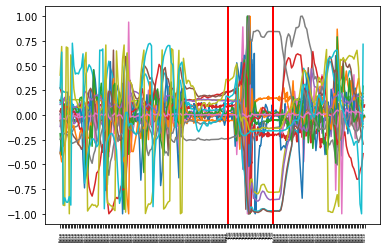

In [8]:
plt.clf()
plot_recording(recordings[0])

2600
13.0

4000
20.0

4000
20.0

4000
20.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0

200
1.0



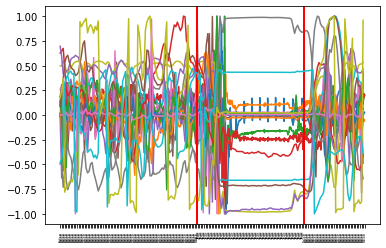

In [9]:
plt.clf()
plot_recording(recordings[1])

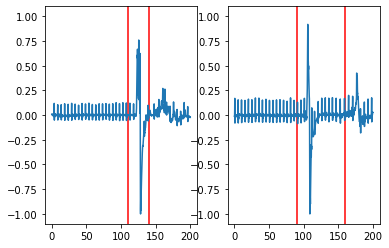

In [10]:
import math 
max_size = math.floor(len(recordings)/2)
fig, axs = plt.subplots(max_size, 2)
row = 0
col = 0

for r in recordings:
    if row != -1:
        data = r.p_ecg
        labels = r.labels
        
        mu = sum(data)/len(data)
        data = [el-mu for el in data]

        if abs(min(data)) > max(data):
            data = [el/abs(min(data)) for el in data]
        else:
            data = [el/max(data) for el in data]

        idxs = getFallIndexes(labels)
        
        if max_size:
            for idx in idxs:
                axs[col].plot([idx]*2, np.linspace(-2,2,2),color="red")

            axs[col].plot(np.arange(0, len(data))*len(labels)/len(data), data)
            axs[col].set_ylim(-1.1,1.1)
        else:
            for idx in idxs:
                axs[row, col].plot([idx]*2, np.linspace(-2,2,2),color="red")

            axs[row, col].plot(np.arange(0, len(data))*len(labels)/len(data), data)
            axs[row, col].set_ylim(-1.1,1.1)
    
    if col < 1:
        col += 1
    elif row < max_size-1:
        row += 1
        col = 0
    else:
        row = -1

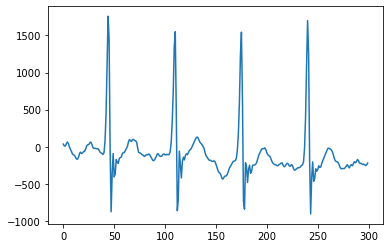

In [11]:
plt.plot(range(len(recordings[0].p_ecg))[0:300], recordings[0].p_ecg[0:300])